In [2]:
import geopandas as gpd
from src.myio import read_gpkg, read_csv, write_parquet, read_dem, read_parquet
import pandas as pd

In [ ]:
lulc_classes_colors = {
    1: {"name": "No Data", "color": "#FFFFFF"},
    2: {"name": "Water", "color": "#1A5BAB"},
    3: {"name": "Trees", "color": "#358221"},
    4: {"name": "Grass", "color": "#A7D282"},
    5: {"name": "Flooded Vegetation", "color": "#87D19E"},
    6: {"name": "Crops", "color": "#FFDB5C"},
    7: {"name": "Scrub/Shrub", "color": "#EECFA8"},
    8: {"name": "Built Area", "color": "#ED022A"},
    9: {"name": "Bare Ground", "color": "#EDE9E4"},
    10: {"name": "Snow/Ice", "color": "#F2FAFF"},
    11: {"name": "Clouds", "color": "#C8C8C8"},
}


In [4]:
lulc_array = read_dem(path="LULC/lulc2018.tif", mode="array")

print(lulc_array)

<xarray.DataArray (y: 3789, x: 3562)> Size: 54MB
[13496418 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 28kB 24.72 24.72 24.72 24.72 ... 25.12 25.12 25.12
  * y            (y) float64 30kB 48.12 48.12 48.12 48.12 ... 47.7 47.7 47.7
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0


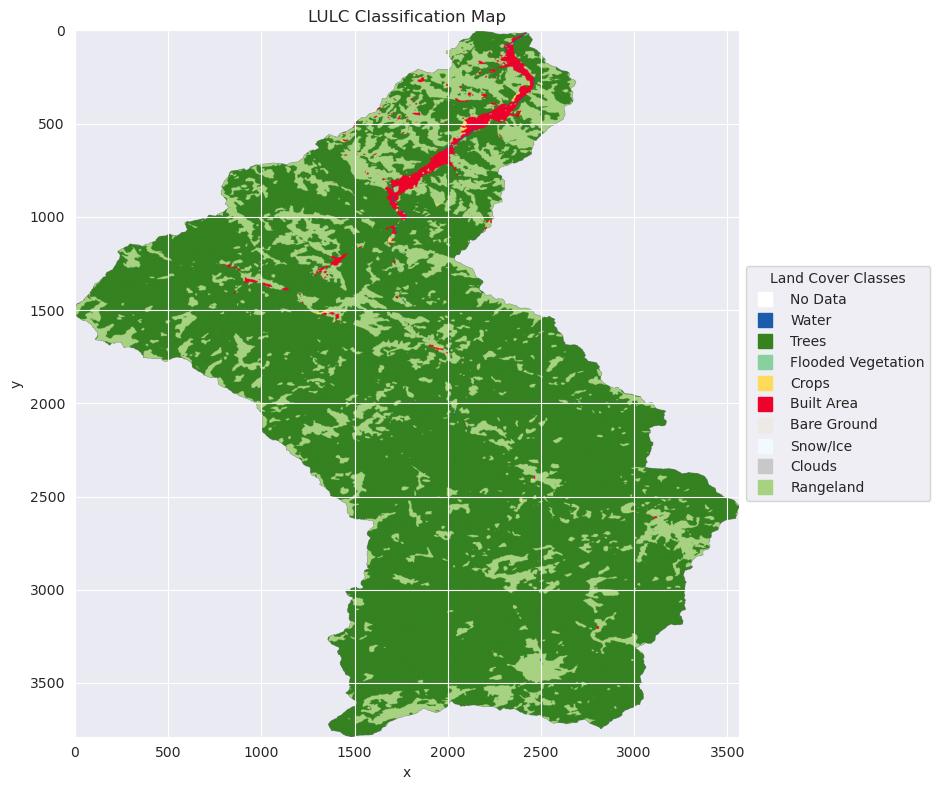

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Твій DataArray (наприклад, після reader.read_raster("array"))
lulc = lulc_array  # наприклад: lulc = reader.read_raster("array")

# Словник: клас → назва → колір
lulc_classes_colors = {
    0:  {"name": "No Data", "color": "#FFFFFF"},
    1:  {"name": "Water", "color": "#1A5BAB"},
    2:  {"name": "Trees", "color": "#358221"},
    4:  {"name": "Flooded Vegetation", "color": "#87D19E"},
    5:  {"name": "Crops", "color": "#FFDB5C"},
    7:  {"name": "Built Area", "color": "#ED022A"},
    8:  {"name": "Bare Ground", "color": "#EDE9E4"},
    9:  {"name": "Snow/Ice", "color": "#F2FAFF"},
    10: {"name": "Clouds", "color": "#C8C8C8"},
    11: {"name": "Rangeland", "color": "#A7D282"}
}


# Підготовка до візуалізації
labels = list(lulc_classes_colors.keys())
colors = [lulc_classes_colors[key]["color"] for key in labels]
names = [lulc_classes_colors[key]["name"] for key in labels]

# Класифікаційна палітра
cmap = mcolors.ListedColormap(colors)
bounds = np.array(labels + [max(labels) + 1]) - 0.5
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Побудова карти
plt.figure(figsize=(12, 8))
im = plt.imshow(lulc.values, cmap=cmap, norm=norm)
plt.title("LULC Classification Map")
plt.xlabel("x")
plt.ylabel("y")

# Створення легенди
patches = [plt.plot([],[], marker="s", ms=10, ls="", mec=None, color=cmap(i))[0] for i in range(len(labels))]
plt.legend(patches, names, loc='center left', bbox_to_anchor=(1, 0.5), title="Land Cover Classes")

plt.tight_layout()
plt.show()



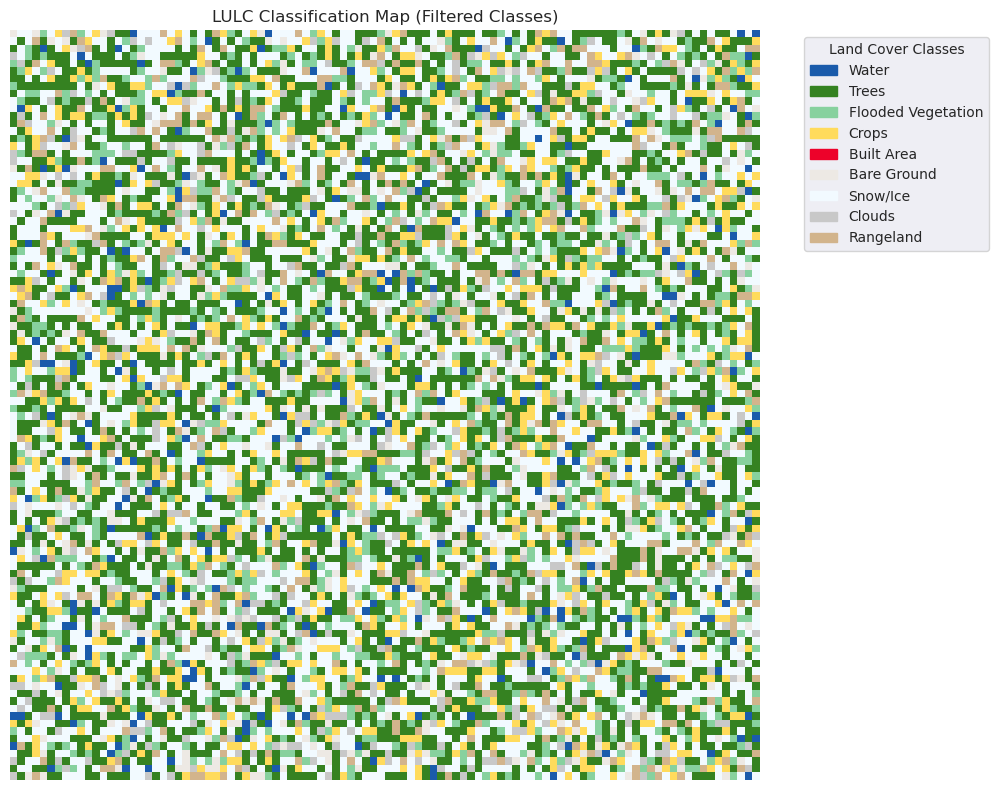

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Отримати унікальні значення
present_classes = np.unique(lulc if isinstance(lulc, np.ndarray) else lulc.values)

# Побудова кольорової палітри
cmap_list = [lulc_classes_colors[c]["color"] for c in present_classes if c in lulc_classes_colors]
class_labels = [lulc_classes_colors[c]["name"] for c in present_classes if c in lulc_classes_colors]
cmap = plt.cm.colors.ListedColormap(cmap_list)

# Якщо DataArray — беремо extent, інакше ні
if hasattr(lulc, 'x') and hasattr(lulc, 'y'):
    x = lulc.x.values
    y = lulc.y.values
    extent = [x.min(), x.max(), y.min(), y.max()]
else:
    extent = None

# Побудова мапи
plt.figure(figsize=(10, 8))
plt.imshow(lulc, cmap=cmap, vmin=min(present_classes), vmax=max(present_classes),
           extent=extent, origin="upper")
plt.title("LULC Classification Map (Filtered Classes)")

# Легенда
legend_patches = [mpatches.Patch(color=lulc_classes_colors[c]["color"],
                                 label=lulc_classes_colors[c]["name"])
                  for c in present_classes if c in lulc_classes_colors]
plt.legend(handles=legend_patches, title="Land Cover Classes",
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.axis("off")
plt.tight_layout()
plt.show()
